In [ ]:
  print("Roey Graif id:315111401\nAmit Hai Bussani id:208384123") # TODO - CHANGE TO YOUR NAMES AND IDs

Roey Graif id:315111401
Amit Hai Bussani id:208384123


#**Introduction to Digital Image Processing**
#**Course Code: 361.1.4751**
###**Exercise 1 - BASIC IMAGE OPERATIONS**

For any questions regarding this assignment, please refer to the course forum on the Moodle website. For personal questions **only**, please email  [thomasm@post.bgu.ac.il](mailto:thomasm@post.bgu.ac.il).

Now that your notebook is set up, we can load the data into the notebook. The code below load the data through mounting Google Drive.
Copy the attached files to your drive and make sure that you save the images outputs also on your drive.   

Here are some resources to help you get started:

- http://colab.research.google.com/notebooks/io.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/ex1' # TODO - UPDATE ME WITH THE TRUE PATH!

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **1. Histogram Manipulation**

### **1.1 Reading the Image**


1.   Read the image named picasso.jpg and transform it into a grayscale image of type double using cv2.cvtColor() with cv2.COLOR_BGR2GRAY and np.float64().

In [3]:
image_path = '/content/drive/MyDrive/ex1/picasso.jpg'
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float64)


2.   Display the image using plt.imshow() and set the parameter cmap to gray. Add a colorbar to the image.



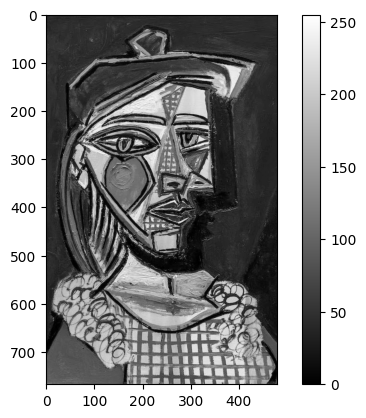

In [4]:
plt.imshow(gray_image, cmap='gray')
plt.colorbar()
plt.show()

3. Write your own function named dip_GN_imread(file_name) that will return a normalized grayscale image. Read the image using Python’s cv2.imread() function, transform it into a grayscale of type double using cv2.cvtColor() with cv2.COLOR_BGR2GRAY and np.float64(). Normalize the image between [0, 1] using:

$$
\frac{img - \text{np.min}(img)}{\text{np.max}(img) - \text{np.min}(img)}
$$

We will use this function from section 1.3

In [5]:
def dip_GN_imread(file_name):
    img = cv2.imread(file_name)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float64)
    normalized_img = (gray_img - np.min(gray_img)) / (np.max(gray_img) - np.min(gray_img))    #the equation above
    return normalized_img

### **1.2 Histogram Construction**
Use the above grayscale picasso image (not the normalized) for the following sections:
1. Write your own function named dip_histogram(img, nbins) that will return
the histogram of the image ’img’ using ’nbins’ bins.

In [7]:
def dip_histogram(img, nbins):
    histogram = np.zeros(nbins)
    for pixel in img.ravel():
        histogram[int(pixel)] += 1    #we count the values
    return histogram

2. Display the generated histogram using 256 bins. Compare your result to Python’s np.histogram() function (use a quan-
titative measurement). Explain the results.

Explaination: As we saw in class we are counting the pixels with the same values and then in the histogram the amount of each value is being displayed.
Since we have more vlaues at around 40 we can see that our picture will be darker.  


Note: Here, you can use the  np.histogram() functions only for
checking your answer.

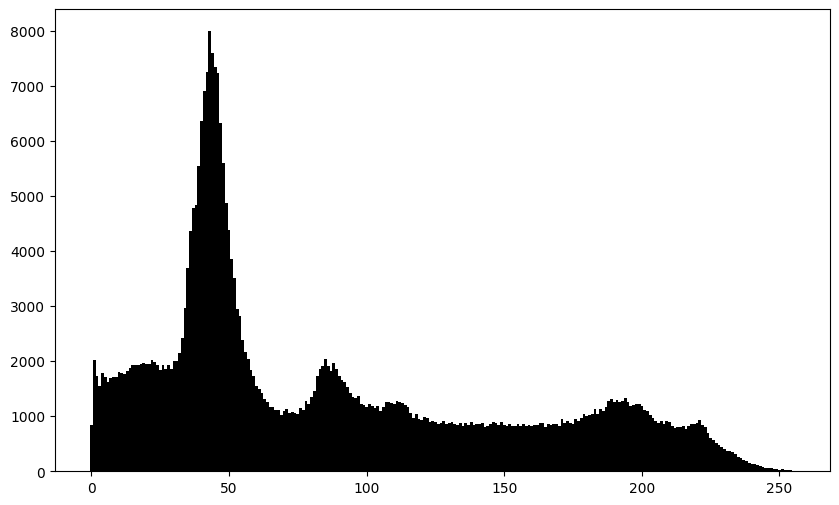

In [8]:
my_histogram = dip_histogram(gray_image, 256)
plt.figure(figsize=(10, 6))
plt.bar(range(256), my_histogram, width=1.0, color='black')
plt.show()

#checking our answer with np.histogram:

#hist, bin_edges = np.histogram(gray_image.ravel(), bins=256, range=(0, 256))
#plt.figure(figsize=(10, 6))
#plt.bar(range(256), hist, width=1.0, color='black')
#plt.show()

### **1.3 Brightness**
From now on, use the normalized gray scale image version of picasso.jpg using the dip_GN_imread(file_name) function.
1. Write your own function named adjust_brightness(img, action, parameter)
in which ’action’ could get either ’mul’ for multiplication or ’add ’ for
addition. Adjust the brightness of ’img’ using the ’parameter’. The output
of the function will be the modified image. The output of the function
will be the modified image. Make sure the output image stay in the [0, 1]
range.

In [9]:
def adjust_brightness(img, action, parameter):
    if action == 'mul':
        new_img = img * parameter
    if action == 'add':
        new_img = img + parameter
    new_img = np.clip(new_img, 0, 1)    #so we wont get out of range
    return new_img

2. Display the original gray scale image together with **one** adjusted image of increased or decreased brightness. Explain the results.

Explantaion: multiplying the pixel value by 4 for each pixel meand that each pixel will be 4 times brighter (or the maximum value which is 1) and therefore we get a brighter image.

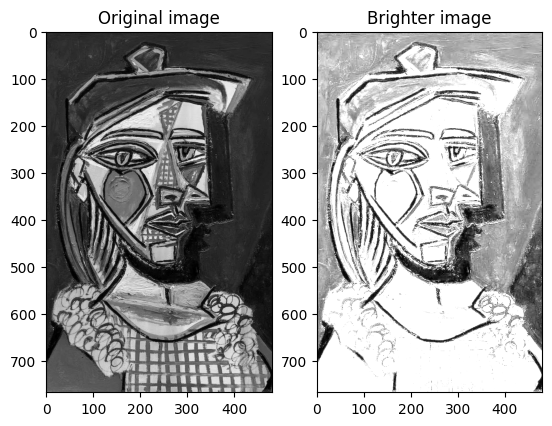

In [11]:
img_gray_normal = dip_GN_imread(image_path)   #we will use this for everything from here on

adj_gray_normal = adjust_brightness(img_gray_normal, 'mul', 4)

plt.subplot(1, 2, 1)
plt.imshow(img_gray_normal, cmap='gray')
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(adj_gray_normal, cmap='gray')
plt.title("Brighter image")
plt.show()

### **1.4 Contrast**

1. Write your own function named adjust_contrast(img,range_low,range_high)
that will change the contrast of the image ’img’ and in which the range_low,range_high
parameters will determine the new dynamic range of modified image. The
output of the function will be the modified image. You should use linear
mapping.

In [12]:
def adjust_contrast(img, range_low, range_high):
    img_min = np.min(img)
    img_max = np.max(img)
    if img_max - img_min == 0:
        return img

    new_img = ((img - img_min) / (img_max - img_min)) * (range_high - range_low) + range_low    #this is linear
    return new_img

2. Calculate the modified image for a new dynamic ranges of [0.45, 0.9] and
[0.4, 0.5] and display the images and corresponding histograms. Explain
the effect of each new range.

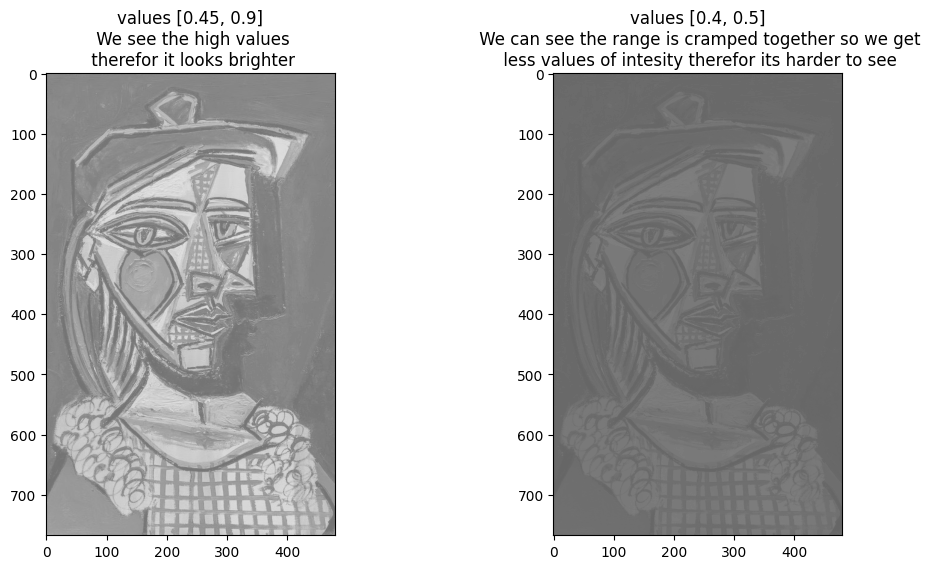

In [13]:
adj_contrast1 = adjust_contrast(img_gray_normal, 0.45, 0.9)
adj_contrast2 = adjust_contrast(img_gray_normal, 0.4, 0.5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(adj_contrast1, cmap='gray', vmin=0, vmax=1)
plt.title("values [0.45, 0.9]\n We see the high values\n therefor it looks brighter")
plt.subplot(1, 2, 2)
plt.imshow(adj_contrast2, cmap='gray', vmin=0, vmax=1)
plt.title("values [0.4, 0.5]\n We can see the range is cramped together so we get\n less values of intesity therefor its harder to see")
plt.show()

### **1.5 Quantization**

Quantize the original gray scale image using 4bit and 1bit. Explain the results.

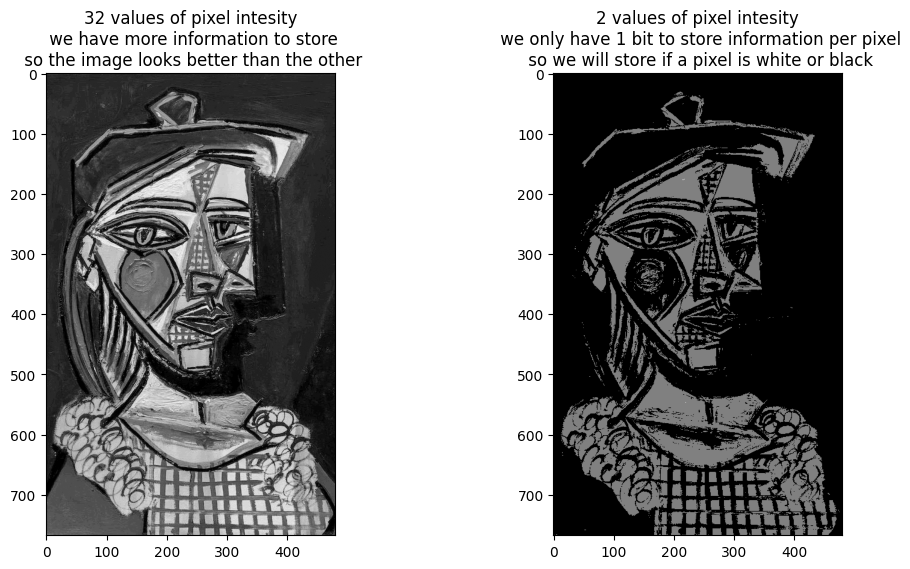

In [14]:
img_4bit = np.floor(img_gray_normal * 32)
img_1bit = np.floor(img_gray_normal * 2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_4bit, cmap='gray')
plt.title("32 values of pixel intesity\n we have more information to store\n so the image looks better than the other")
plt.subplot(1, 2, 2)
plt.imshow(img_1bit, cmap='gray')
plt.title("2 values of pixel intesity\n we only have 1 bit to store information per pixel\n so we will store if a pixel is white or black")
plt.show()

### **1.6 Histogram Equalization**

1. Read the image named dog.jpg ,transform it into a gray scale image of type
double and normalize it between [0, 1] using dip_GN_imread(file_name)

In [15]:
image_path_dog = '/content/drive/MyDrive/ex1/dog.jpg'
img_dog_gray = dip_GN_imread(image_path_dog)

2. Use the Python’s cv2.equalizeHist() to apply the histogram equalization on the image .

In [19]:
#the image is between 0 and 1 values so we fix it to be 0 to 255 values and then use the function equalizeHist
equalized_image = cv2.equalizeHist((img_dog_gray * 255).astype(np.uint8))

3. Display the new image and the corresponding histogram.

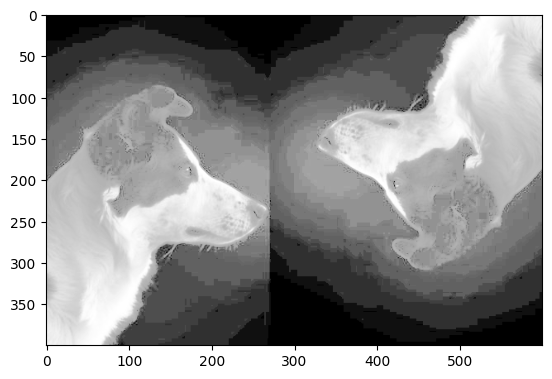

In [20]:
plt.subplot(1, 1, 1)
plt.imshow(equalized_image, cmap='gray')
plt.show()

4. Why histogram equalization fail in enhance the image?
TODO

### **1.7 Histogram Matching - Optional Section**

1. Take an image using your camera/phone/computer, read the image and
transform it into a gray scale image of type double and normalize it be-
tween [0, 1] using dip_GN_imread(file_name) function.

In [22]:
image_path = '/content/drive/MyDrive/ex1/dog.jpg'   #I used the picture of the dog
img_dog = dip_GN_imread(image_path)

2. Read the image named city.jpg and transform it into a gray scale image of
type double and normalize it between [0, 1] using dip_GN_imread(file_name).

In [23]:
image_path = '/content/drive/MyDrive/ex1/city.jpg'
img_city = dip_GN_imread(image_path)

3. Read the image named face.jpg ,cast it into a double type and normalize
it between [0, 1].

In [24]:
image_path = '/content/drive/MyDrive/ex1/face.jpg'
img_face = dip_GN_imread(image_path)

4. Display all the three images and their corresponding histograms.

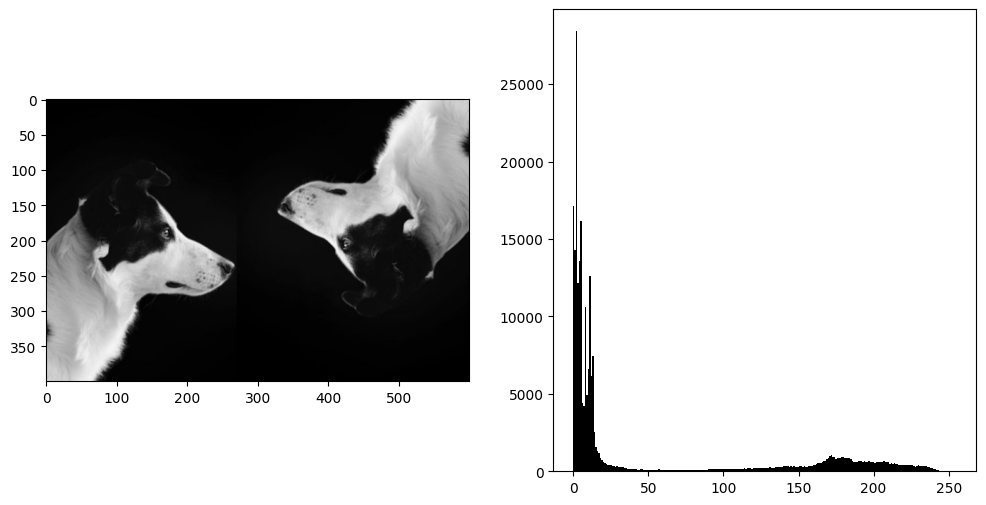

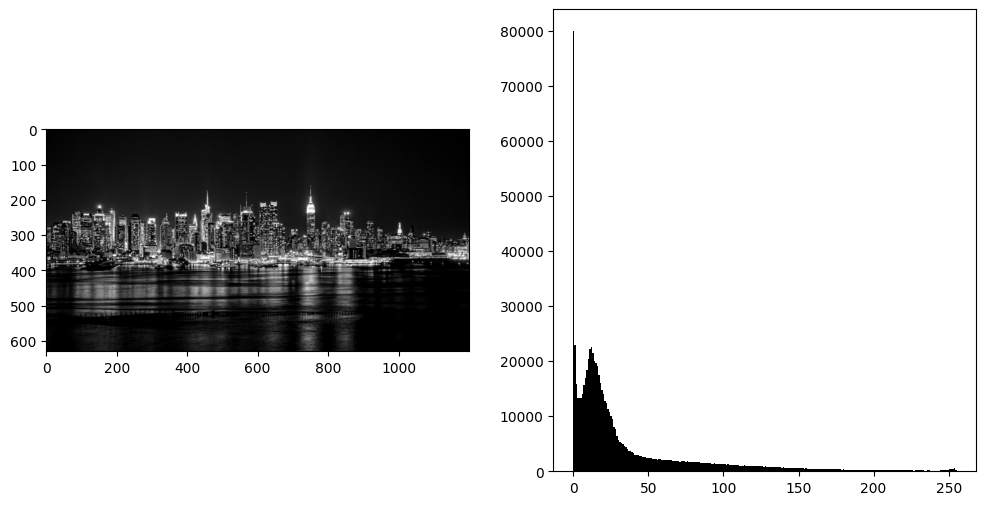

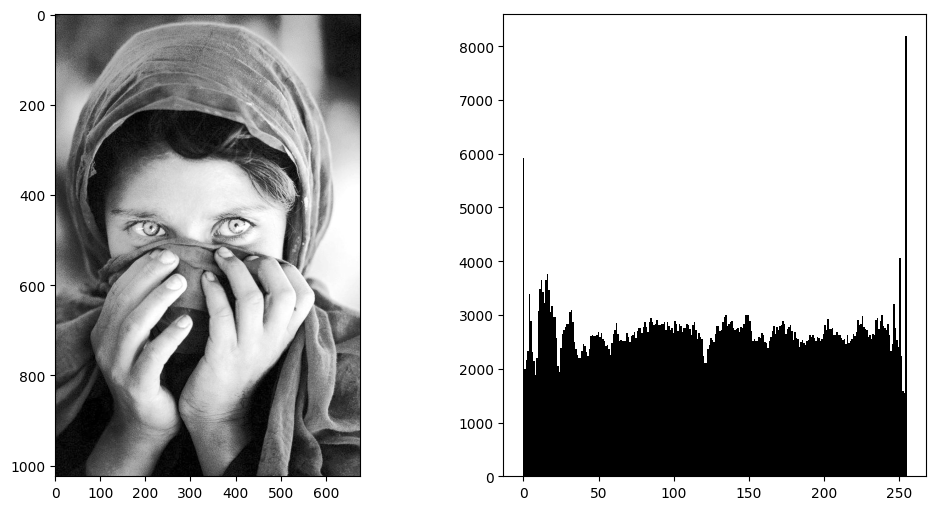

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_dog, cmap='gray')

my_histogram = dip_histogram(img_dog*255, 256)
plt.subplot(1, 2, 2)
plt.bar(range(256), my_histogram, width=1.0, color='black')
plt.show()
#############

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_city, cmap='gray')

my_histogram = dip_histogram(img_city*255, 256)
plt.subplot(1, 2, 2)
plt.bar(range(256), my_histogram, width=1.0, color='black')
plt.show()
#############


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_face, cmap='gray')

my_histogram = dip_histogram(img_face*255, 256)
plt.subplot(1, 2, 2)
plt.bar(range(256), my_histogram, width=1.0, color='black')
plt.show()



5. Use the Python function skimage.exposure.match_histograms() to match the histogram of your image to the histogram of face.jpg and city.jpg.

In [27]:
from skimage.exposure import match_histograms

img_dog_uint8 = (img_dog * 255).astype('uint8')   #for every picture fix its values to be between 0 and 255
img_face_uint8 = (img_face * 255).astype('uint8')
img_city_uint8 = (img_city * 255).astype('uint8')


# Perform histogram matching
matched_city = match_histograms(img_dog_uint8, img_city_uint8)
matched_face = match_histograms(img_dog_uint8, img_face_uint8)


6. Display the new images and their corresponding histograms.

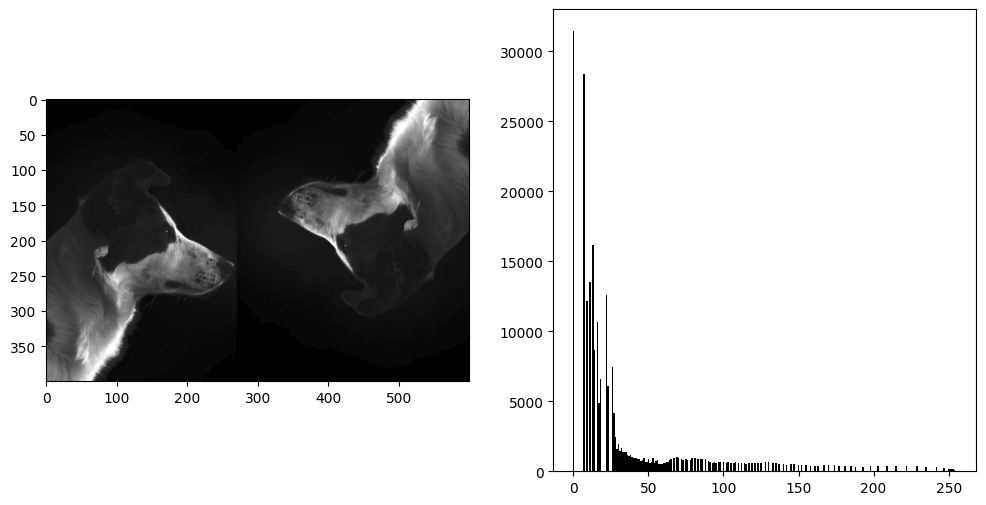

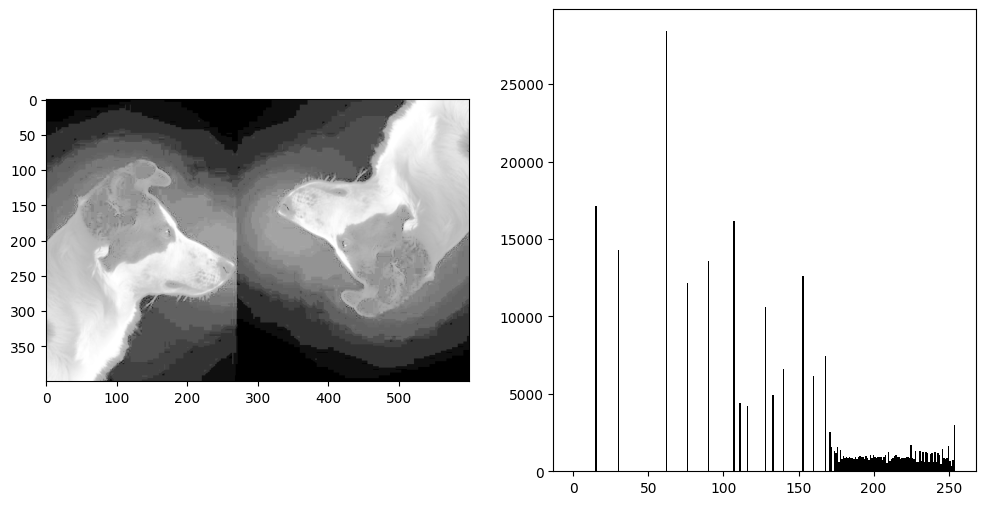

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(matched_city, cmap='gray')

my_histogram = dip_histogram(matched_city, 256)
plt.subplot(1, 2, 2)
plt.bar(range(256), my_histogram, width=1.0, color='black')
plt.show()
############

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(matched_face, cmap='gray')

my_histogram = dip_histogram(matched_face, 256)
plt.subplot(1, 2, 2)
plt.bar(range(256), my_histogram, width=1.0, color='black')
plt.show()

7. Explain the results. In your explanation, consider the quality of the new
images.

Explantaion: the histogram of the dog image and the city seem to be very similare therefore when we match their histograms we barely get a big change we got a darker image since the city has darker colors yet the imaage quality seems to be in tact and well preserved. On the other hand the dog image and the face image have big diffrences in their histograms and then when we match the histogram we change to much that we begin to lose quality of the image.

## **2. Spatial Filters and Noise**

### **2.1 Read the Image**
Read the image named dog.jpg and transform it into a gray scale normalized
image in the range [0, 1] using dip_GN_imread(file_name). Use this image
from now on.

In [29]:
#def dip_GN_imread(file_name):
#  img = cv2.imread(file_name)
#  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float64)
#  normalized_dog_img = (gray_img - np.min(gray_img)) / (np.max(gray_img) - np.min(gray_img))
#  return normalized_dog_img
file_name = '/content/drive/MyDrive/ex1/dog.jpg'
normalized_image = dip_GN_imread(file_name)
#plt.figure(figsize=(8, 8))
#plt.imshow(normalized_image, cmap='gray')
#plt.show()




### **2.2 Mean vs Median Filter**

1.  Write a function named mean_filter(img, k) that will apply a 2-D k-by-k
mean filter on the image ’img’. Make sure that the size of the output
image is the same as the input image. Find a method to address the
boundaries and explain how you implemented it.

In [31]:
def mean_filter(img, k):
    output_img = np.zeros_like(img)
    pad = k // 2    # the distance from the edge to the beginning of a window
    padded_img = np.pad(img, ((pad, pad), (pad, pad)), mode='edge') # duplicate the values ​​at the edges
    for i in range(img.shape[0]):    # Go over all pixels in the original image
        for j in range(img.shape[1]):
            window = padded_img[i:i+k, j:j+k]   # calculate the average for a k x k window
            output_img[i, j] = np.mean(window)
    return output_img


2. Write a function named median_filter(img, k)
that will apply a 2-D k-by-k median filter on the image ’img’. Make sure
that the size of the output image is the same as the input image. Find a
method to deal with the boundaries.

In [32]:
def median_filter(img, k):
  output_img = np.zeros_like(img)  #new image the same size as the original image
  pad = k // 2     # the distance from the edge to the beginning of a window
  padded_img = np.pad(img, ((pad, pad), (pad, pad)), mode='edge')
  for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i+k, j:j+k] # Calculate the median for a k x k window
            output_img[i, j] = np.median(window)

  return output_img

3. Filter the dog.jpg image using the functions above for k=3, 9, display the results and explain the results (refer to median vs. mean and the
kernel size effect ).

Main Differences Between Median Filter and Mean Filter: Dealing with Noise: Median Filter: The median filter is excellent for removing noise. It does not alter the physical values of the image but selects the median value among the surrounding pixels. As a result, it manages to preserve more details without losing important content in the image. Mean Filter: The mean filter is effective at reducing noise but is less resilient to extreme noise because it includes extreme values in the average. As a result, it is less efficient in cases of isolated noise and tends to "blur" the image more strongly. Effect of the Window Size k: When the window is small (k=3) : Both filters preserve more details and sharpness, but they do not eliminate all noise. The median filter will perform better in handling noise. When the window is large (k=9): The image becomes more blurred because the window includes more pixels in the average/median calculation. The median filter still preserves the image's structure better than the mean filter, especially when there is external noise. Mean Filter: As k increases, the image becomes more uniform because it calculates the average of more pixels. The image becomes less sharp since the influence of each individual pixel is spread more across the area. Median Filter: On the other hand, with the median filter, increasing k does not cause uniform blurring; it only considers more pixels in determining the median, which can lead to a result where the image changes less in response to noise.





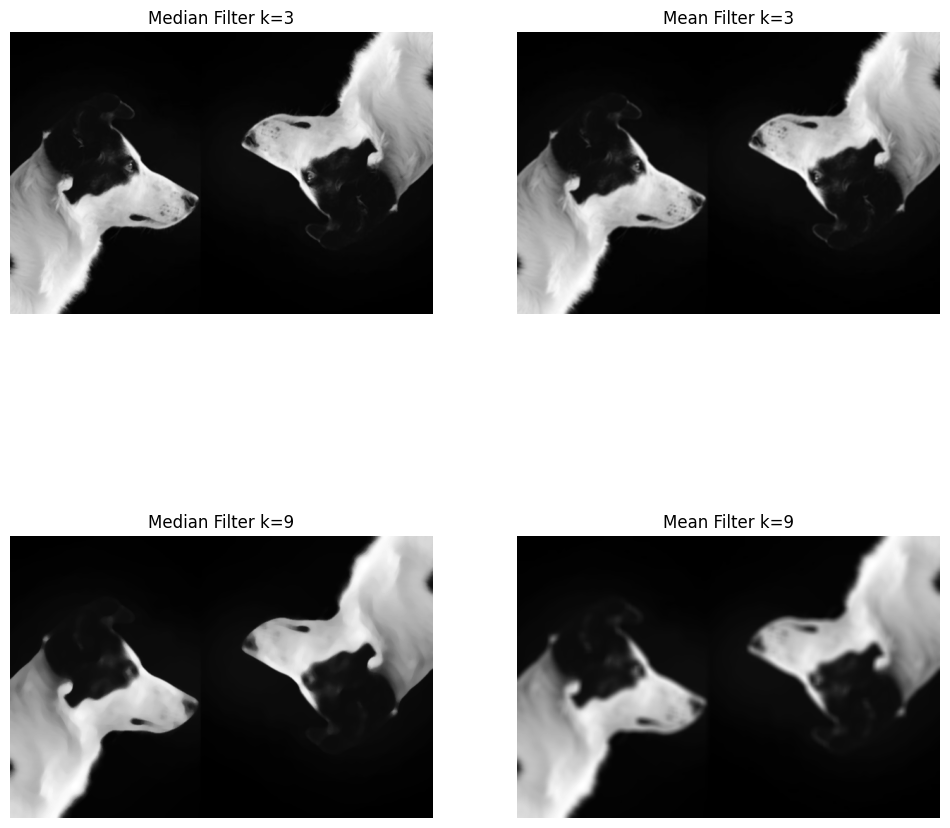

In [33]:
file_name = '/content/drive/MyDrive/ex1/dog.jpg'
image = dip_GN_imread(file_name)
median_3 = median_filter(image, 3)
median_9 = median_filter(image, 9)
mean_3 = mean_filter(image, 3)
mean_9 = mean_filter(image, 9)
plt.figure(figsize=(12, 12))

# Median Filter k=3
plt.subplot(2, 2, 1)
plt.imshow(median_3, cmap='gray')
plt.title('Median Filter k=3')
plt.axis('off')

# Median Filter k=9
plt.subplot(2, 2, 3)
plt.imshow(median_9, cmap='gray')
plt.title('Median Filter k=9')
plt.axis('off')

# Mean Filter k=3
plt.subplot(2, 2, 2)
plt.imshow(mean_3, cmap='gray')
plt.title('Mean Filter k=3')
plt.axis('off')

# Mean Filter k=9
plt.subplot(2, 2, 4)
plt.imshow(mean_9, cmap='gray')
plt.title('Mean Filter k=9')
plt.axis('off')

plt.show()



### **2.3 Gaussian Filter**

1.  Write a function named dip_gaussian_filter(img, k, sigma) that will ap-
ply a 2-D k-by-k Gaussian filter on the image ’img’. The smoothing kernel
should be with covariance matrix of
   $$
   \begin{bmatrix}
   \sigma & 0 \\
   0 & \sigma
   \end{bmatrix}
   $$
Hint: use np.meshgrid() function in Python to create the grid and apply the Gaussian formula on the grid to create
your kernel.

In [35]:
def dip_gaussian_filter(img, k, sigma):
    center = k // 2  # this is the center of the kernel
    x = np.linspace(-center, center, k)  # X and Y values from -k//2 to k//2
    y = np.linspace(-center, center, k)
    X, Y = np.meshgrid(x, y)

    kernel = np.exp(-(X**2 + Y**2) / (2 * sigma**2))  # gaussian equation
    kernel /= np.sum(kernel)  # normalize to make sure the sum of the kernel is 1
    filtered_img = cv2.filter2D(img, -1, kernel)  # convolution with the kernel

    return filtered_img

2. Display the filtered images using (k, sigma) = (3, 0.2), (3, 1.7), (9,0.2). Briefly explain your results.

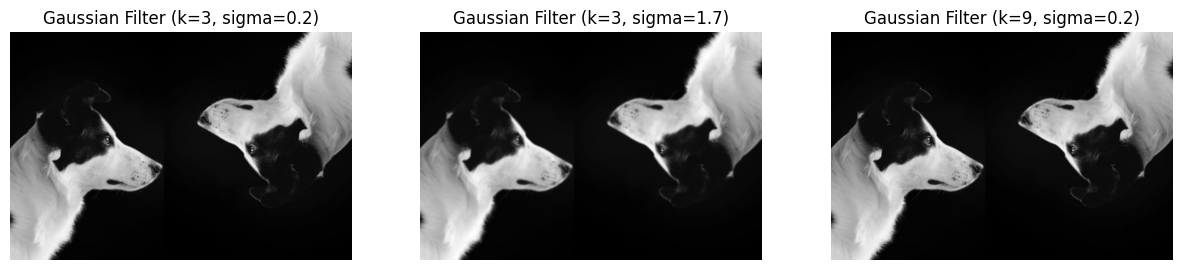

In [37]:
file_name = '/content/drive/MyDrive/ex1/dog.jpg'
image = dip_GN_imread(file_name)
params = [(3, 0.2), (3, 1.7), (9, 0.2)] # values for (k, sigma)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (k, sigma) in enumerate(params):
    filtered_image = dip_gaussian_filter(image, k, sigma) #in this line we filter the image using the Gaussian filter function.
    axes[i].imshow(filtered_image, cmap='gray')   #printing the images
    axes[i].set_title(f"Gaussian Filter (k={k}, sigma={sigma})")
    axes[i].axis('off')

plt.show()

3. Subtract the original image from one of the filtered images. Display
the new image using  Python’s plt.imshow() . Explain what you see.

The Gaussian filter is a smoothing filter used for image blurring and noise reduction. The dependency on k and σ significantly affects the filtering result: Kernel size (k): A larger k means the filter covers more pixels in the neighborhood and performs stronger smoothing, leading to more blurring of the image. A smaller kernel preserves more details but may be less effective at noise removal. Standard deviation (σ): A higher σ results in a wider spread of the Gaussian function, meaning the filter will be less focused and perform more blurring. A lower σ means the influence of each pixel is more localized, preserving more details in the image.


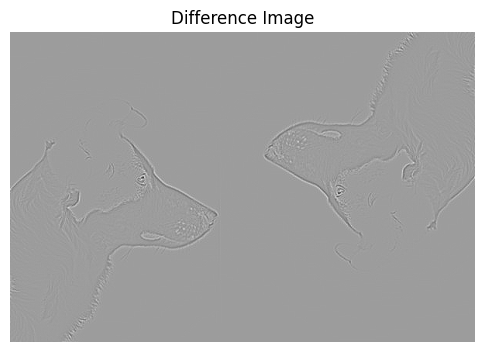

In [38]:
file_name = '/content/drive/MyDrive/ex1/dog.jpg'
image = dip_GN_imread(file_name)
k, sigma = 3, 0.2
filtered_image = dip_gaussian_filter(image, k, sigma)
difference_image =filtered_image - image # Subtract the original image from the filtered image
plt.figure(figsize=(6, 6)) #Display the difference image (the difference)
plt.imshow(difference_image, cmap='gray')
plt.axis('off')
plt.title('Difference Image')
plt.show()

### **2.4 Noise Filtering**

1.  Create 2 new images by adding 2 different kinds of noises to the original image using Python’s skimage.util.random_noise()
function. The noises are: ’salt & pepper’, ’gaussian’.

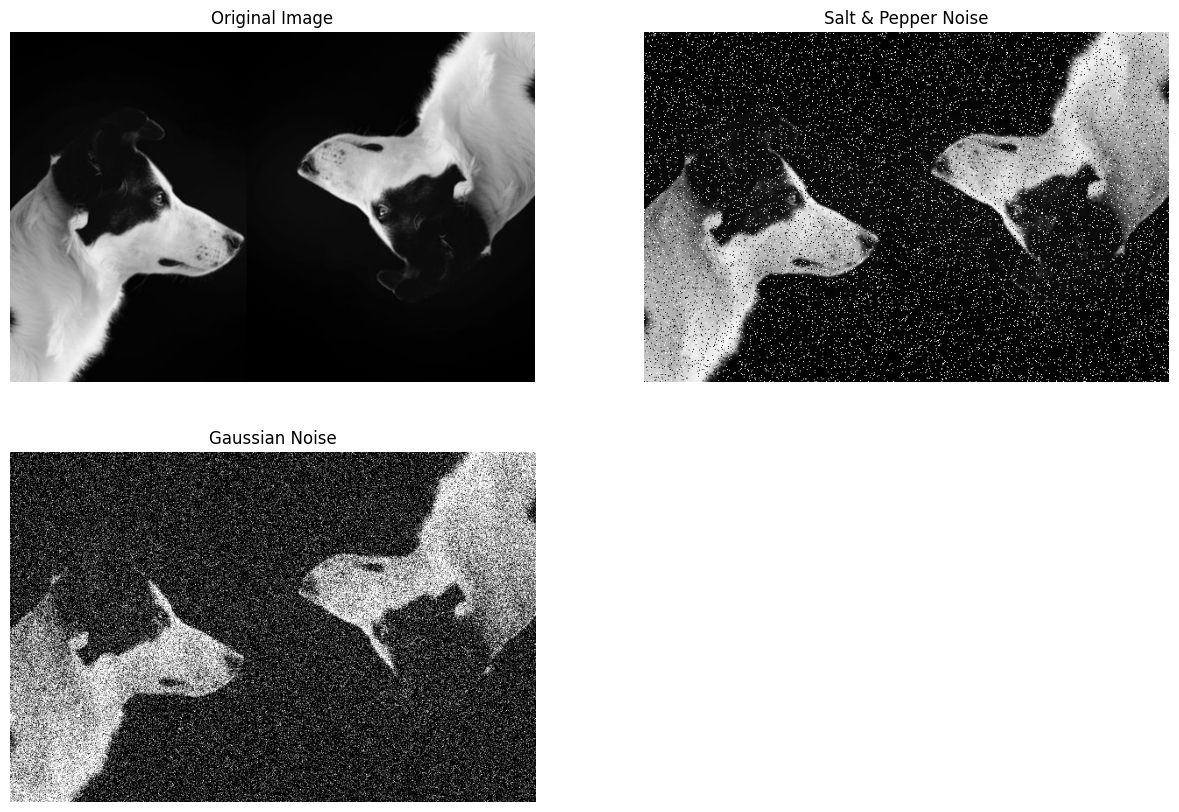

In [40]:
from skimage.util import random_noise

file_name = '/content/drive/MyDrive/ex1/dog.jpg'
image = dip_GN_imread(file_name)

image_gaussian = random_noise(image, mode='gaussian', var=0.1)  # Add Gaussian noise
image_salt_pepper = random_noise(image, mode='s&p', amount=0.1)  # Add salt and pepper noise

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_salt_pepper, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_gaussian, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.show()


2. Apply the implemented filters on each of the noisy images. Use kernel
sizes of 3x3 and 9x9 for mean, median and gaussian filters. Display only
the best filter result for each noisy image.

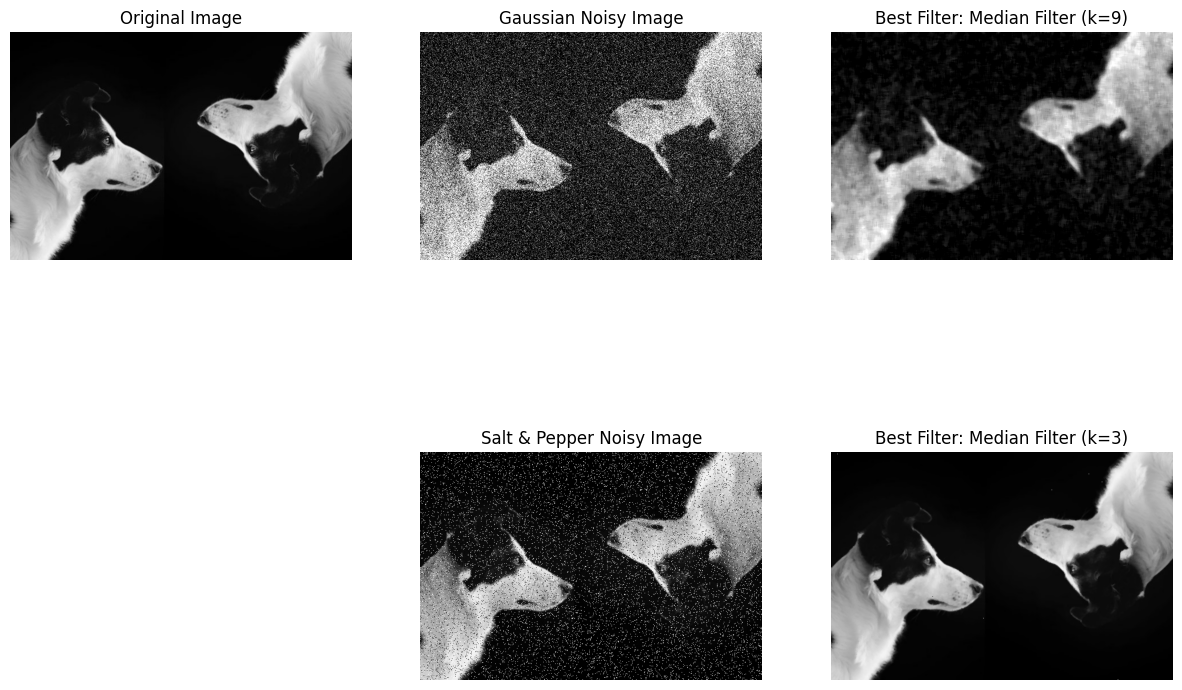

In [42]:
def mean_squared_error(original, filtered):   #function to calculate MSE as seen in class
    return np.mean((original - filtered) ** 2)

def find_best_filter(original, noisy, kernel_sizes, sigma_values):    # function to apply filters and find the best result
    best_result = None
    best_metric = float('inf')
    best_filter_name = ""

    for k in kernel_sizes:
        mean_img = mean_filter(noisy, k)
        mse_mean = mean_squared_error(original, mean_img)
        if mse_mean < best_metric:
            best_metric = mse_mean
            best_result = mean_img
            best_filter_name = f"Mean Filter (k={k})"

        median_img = median_filter(noisy, k)
        mse_median = mean_squared_error(original, median_img)
        if mse_median < best_metric:
            best_metric = mse_median
            best_result = median_img
            best_filter_name = f"Median Filter (k={k})"

    for k in kernel_sizes:
        for sigma in sigma_values:
            gaussian_img = dip_gaussian_filter(noisy, k, sigma)
            mse_gaussian = mean_squared_error(original, gaussian_img)
            if mse_gaussian < best_metric:
                best_metric = mse_gaussian
                best_result = gaussian_img
                best_filter_name = f"Gaussian Filter (k={k}, sigma={sigma})"

    return best_result, best_filter_name

kernel_sizes = [3, 9]
sigma_values = [0.2, 1.0]

best_gaussian_result, best_gaussian_name = find_best_filter(image, image_gaussian, kernel_sizes, sigma_values)
best_salt_pepper_result, best_salt_pepper_name = find_best_filter(image, image_salt_pepper, kernel_sizes, sigma_values)

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gaussian Noisy Image
plt.subplot(2, 3, 2)
plt.imshow(image_gaussian, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.axis('off')

# Best Filtered Gaussian Image
plt.subplot(2, 3, 3)
plt.imshow(best_gaussian_result, cmap='gray')
plt.title(f"Best Filter: {best_gaussian_name}")
plt.axis('off')

# Salt & Pepper Noisy Image
plt.subplot(2, 3, 5)
plt.imshow(image_salt_pepper, cmap='gray')
plt.title('Salt & Pepper Noisy Image')
plt.axis('off')

# Best Filtered Salt & Pepper Image
plt.subplot(2, 3, 6)
plt.imshow(best_salt_pepper_result, cmap='gray')
plt.title(f"Best Filter: {best_salt_pepper_name}")
plt.axis('off')

plt.show()


3. Briefly explain your results. What is the effect of each filter on each noise?
Which is the best filter for any given noise? what kernel size work the best?
What are the pros and cons of each filter?

In the solution of the section I went to test the best filter using MSE , by definition it calculates which of the images after the filter is closest to the original image.
The median provides a better solution for both types of noise, which is more resistant to extreme values ​​(such as salt and pepper noise) and is effective in removing Gaussian noise that can sharply affect the individual image. Therefore, the MSE (which measures the error compared to the original image) may indicate that the median yields the best result for both types of noise, because it retains most of the individual image can introduce significant distortions.




## **3. Bonus Question**
Choose a noisy image (you can "trash" a clean image or start with noisy one) as
you wish and try to fix it using the histogram manipulation and filters. You are
more then welcome to use other ways. Display the initial image together with
the modified image in the document. Be creative! One of the images will
be chosen by the course staff and it’s authors will receive 0.5 bonus
point to the final grade. The staff will judge by the visual result, originality
and the code. Explain!

Explanation: We go over 3 filters and over a few values of sigma and k to recieve the one that works best we use psnr instead of MSE because we believe the results are better if we use psnr as our indicator for how good the fixed image is. We do all of this in a resonable time complexity. We also thought about using gardient decent as a method to find the best sigma parameters but encountered a few errors so we decided to stick with the original plan.

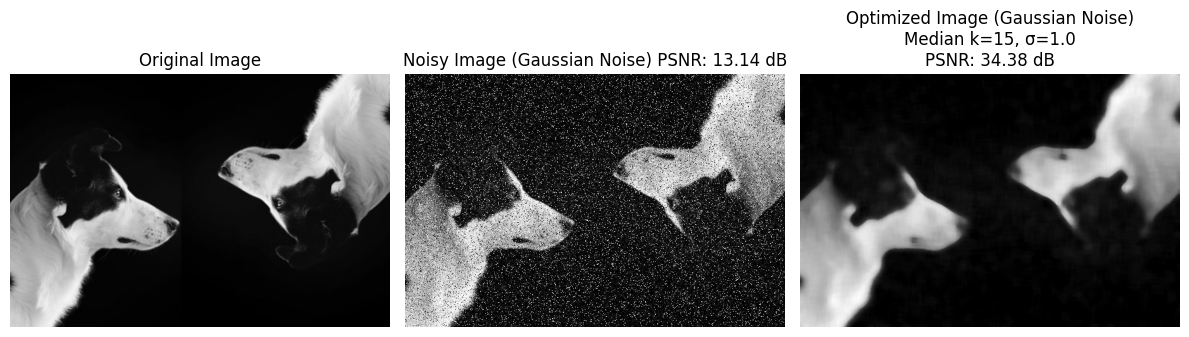

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, sigma):
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255)

def add_salt_and_pepper_noise(image, amount):
    noisy_image = np.copy(image)
    total_pixels = noisy_image.size
    num_salt = int(total_pixels * amount / 2)
    num_pepper = int(total_pixels * amount / 2)

    salt_coords = [np.random.randint(0, i-1, num_salt) for i in noisy_image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in noisy_image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

def psnr(original, filtered):   #we think this is a better indicator then MSE
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

def mean_filter(img, k):
    return cv2.blur(img, (k, k))

def median_filter(img, k):
    return cv2.medianBlur(img.astype(np.uint8), k)

def gaussian_filter(img, k, sigma):
    return cv2.GaussianBlur(img, (k, k), sigma)

#checking 3 filters and some of its values and returning the best filter and the best values to use for it
#the values are sigma and k and we check for the best ones to use in a resonable time complexity
def optimize_filters(original, noisy):
    best_img = noisy
    best_psnr_value = psnr(original, noisy)
    best_params = {'filter': None, 'k': 3, 'sigma': 1}


    for k in [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]:
        for sigma in np.arange(1.0, 2.0, 0.1):
            for filter_name, filter_func in [('Mean', mean_filter),
                                             ('Median', median_filter),
                                             ('Gaussian', gaussian_filter)]:
                if filter_name == 'Gaussian':
                    filtered_img = filter_func(noisy, k, sigma)
                else:
                    filtered_img = filter_func(noisy, k)

                current_psnr = psnr(original, filtered_img)
                if current_psnr > best_psnr_value:
                    best_psnr_value = current_psnr
                    best_img = filtered_img
                    best_params = {'filter': filter_name, 'k': k, 'sigma': sigma}

    return best_img, best_psnr_value, best_params


image = cv2.imread('/content/drive/MyDrive/ex1/dog.jpg', cv2.IMREAD_GRAYSCALE)
sigma = 30
noisy_image_gaussian = add_gaussian_noise(image, sigma)
noisy_image = add_salt_and_pepper_noise(noisy_image_gaussian, 0.1)


optimized_image, best_psnr_value, best_params = optimize_filters(image, noisy_image)

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy Image (Gaussian Noise) PSNR: {psnr(image, noisy_image):.2f} dB')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(optimized_image, cmap='gray')
plt.title(f"Optimized Image (Gaussian Noise)\n{best_params['filter']} k={best_params['k']}, σ={best_params['sigma']:.1f}\nPSNR: {best_psnr_value:.2f} dB")
plt.axis('off')


plt.tight_layout()
plt.show()